In [12]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [2]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.39 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/78.2 GB disk)


In [3]:
!pip install supervision

from IPython import display
display.clear_output()

import supervision as sv
print("supervision", sv.__version__)

supervision 0.21.0


In [4]:
!pip install supervision[assets] -q

from IPython import display
display.clear_output()

In [5]:
from supervision.assets import download_assets, VideoAssets
from IPython import display

download_assets(VideoAssets.GROCERY_STORE)
display.clear_output()

In [6]:
from ultralytics import YOLO

model = YOLO('yolov8s.pt')

100%|██████████| 21.5M/21.5M [00:00<00:00, 407MB/s]



0: 736x1280 1 person, 4 bottles, 1 chair, 1 tv, 2 refrigerators, 95.0ms
Speed: 23.1ms preprocess, 95.0ms inference, 730.6ms postprocess per image at shape (1, 3, 736, 1280)


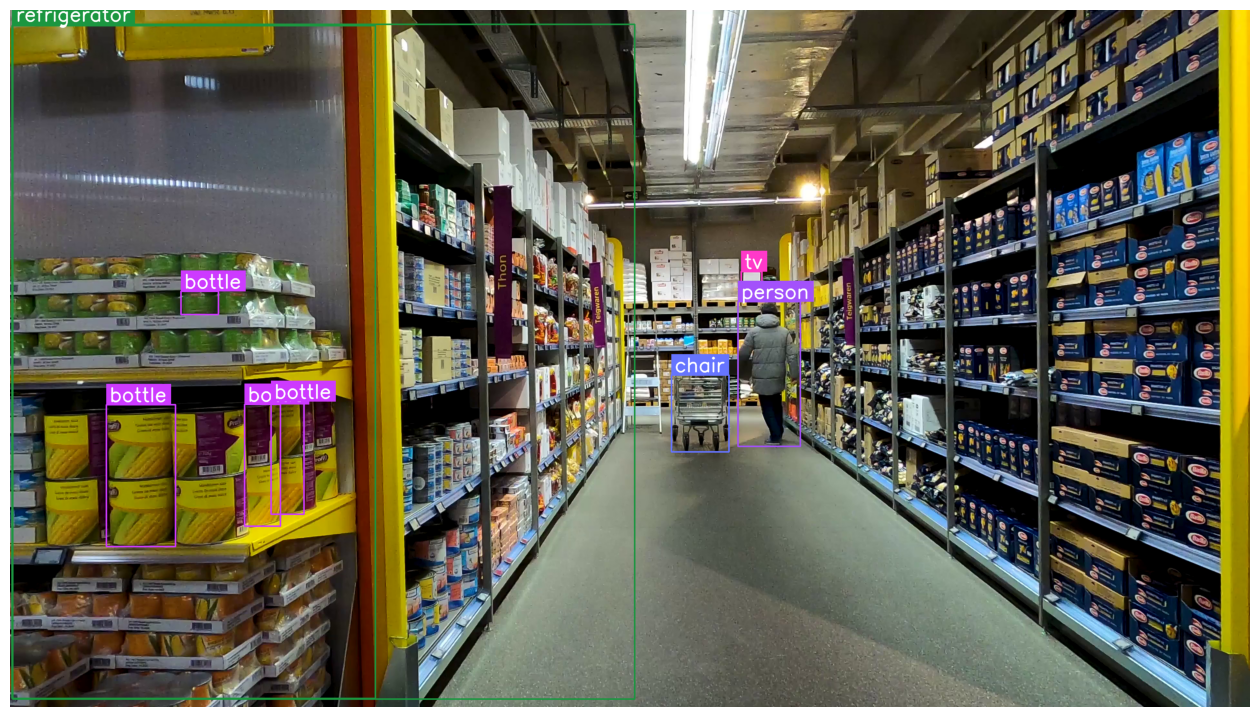

In [7]:
import supervision as sv

# extract video frame
generator = sv.get_video_frames_generator(VideoAssets.GROCERY_STORE.value)
iterator = iter(generator)
frame = next(iterator)

# detect
results = model(frame, imgsz=1280)[0]
detections = sv.Detections.from_ultralytics(results)

# annotate
box_annotator = sv.BoundingBoxAnnotator(thickness=4)
label_annotator = sv.LabelAnnotator(text_thickness=4, text_scale=2)
frame = box_annotator.annotate(scene=frame, detections=detections)
frame = label_annotator.annotate(scene=frame, detections=detections)

%matplotlib inline
sv.plot_image(frame, (16, 16))


0: 736x1280 1 person, 4 bottles, 1 chair, 1 tv, 2 refrigerators, 30.1ms
Speed: 10.5ms preprocess, 30.1ms inference, 2.0ms postprocess per image at shape (1, 3, 736, 1280)


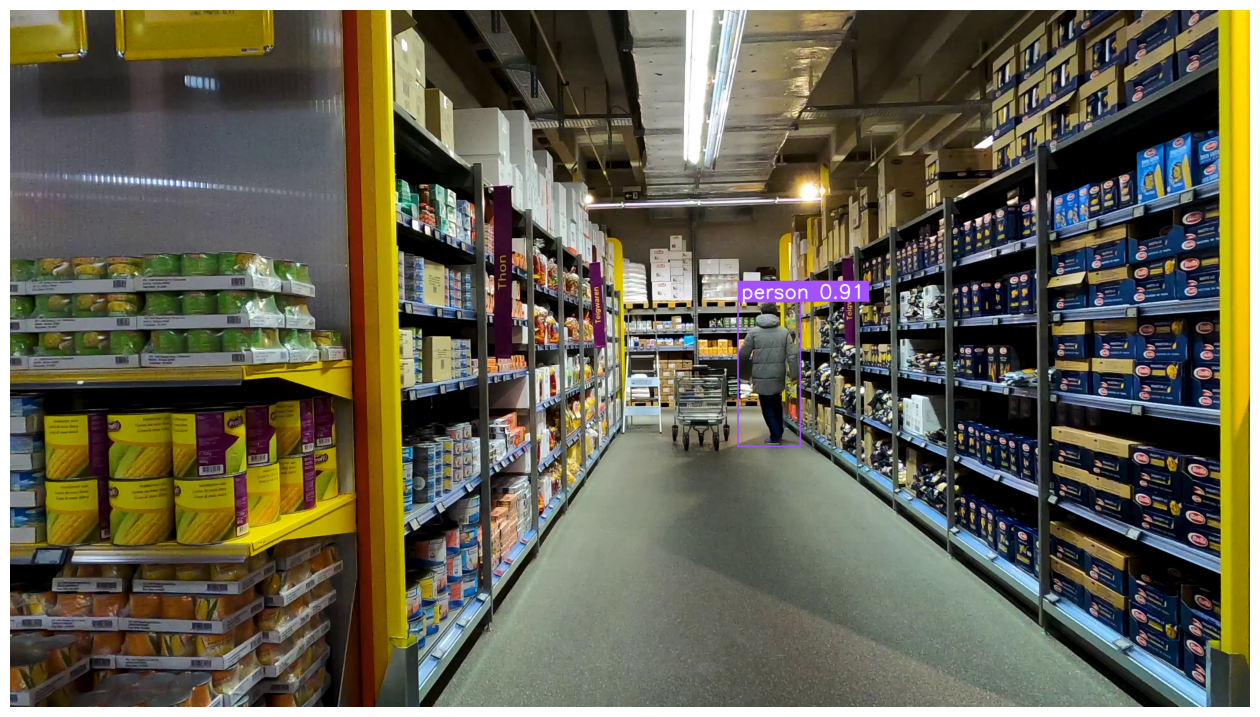

In [8]:
import supervision as sv

# extract video frame
generator = sv.get_video_frames_generator(VideoAssets.GROCERY_STORE.value)
iterator = iter(generator)
frame = next(iterator)

# detect
results = model(frame, imgsz=1280)[0]
detections = sv.Detections.from_ultralytics(results)
detections = detections[detections.class_id == 0]

# annotate
box_annotator = sv.BoundingBoxAnnotator(thickness=4)
label_annotator = sv.LabelAnnotator(text_thickness=4, text_scale=2)
labels = [f"{model.names[class_id]} {confidence:0.2f}" for _, _, confidence, class_id, _, _ in detections]
frame = box_annotator.annotate(scene=frame, detections=detections)
frame = label_annotator.annotate(scene=frame, detections=detections, labels=labels)

%matplotlib inline
sv.plot_image(frame, (16, 16))


0: 736x1280 1 person, 4 bottles, 1 chair, 1 tv, 2 refrigerators, 30.0ms
Speed: 10.2ms preprocess, 30.0ms inference, 1.7ms postprocess per image at shape (1, 3, 736, 1280)


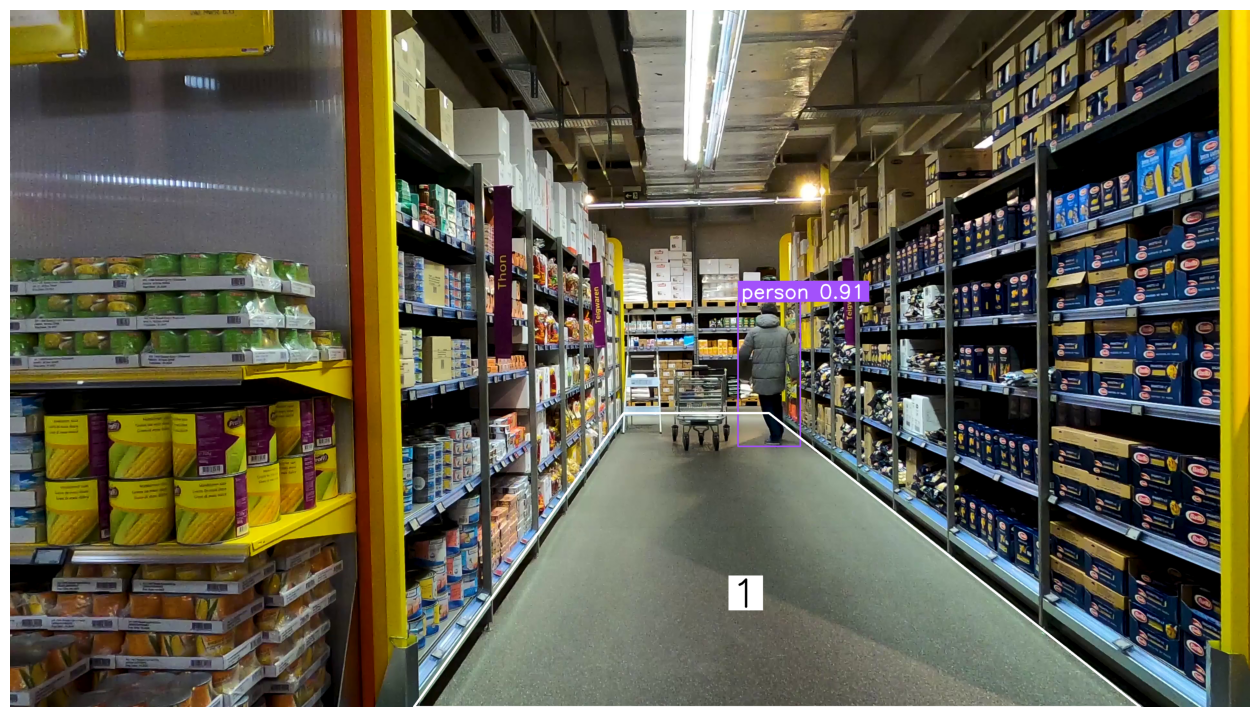

In [9]:
import numpy as np
import supervision as sv

# initiate polygon zone
polygon = np.array([
    [1900, 1250],
    [2350, 1250],
    [3500, 2160],
    [1250, 2160]
])
video_info = sv.VideoInfo.from_video_path(VideoAssets.GROCERY_STORE.value)
zone = sv.PolygonZone(polygon=polygon)

# initiate annotators
box_annotator = sv.BoundingBoxAnnotator(thickness=4)
label_annotator = sv.LabelAnnotator(text_thickness=4, text_scale=2)
zone_annotator = sv.PolygonZoneAnnotator(zone=zone, color=sv.Color.WHITE, thickness=6, text_thickness=6, text_scale=4)

# extract video frame
generator = sv.get_video_frames_generator(VideoAssets.GROCERY_STORE.value)
iterator = iter(generator)
frame = next(iterator)

# detect
results = model(frame, imgsz=1280)[0]
detections = sv.Detections.from_ultralytics(results)
detections = detections[detections.class_id == 0]
zone.trigger(detections=detections)

# annotate
labels = [f"{model.names[class_id]} {confidence:0.2f}" for _, _, confidence, class_id, _, _ in detections]
frame = box_annotator.annotate(scene=frame, detections=detections)
frame = label_annotator.annotate(scene=frame, detections=detections, labels=labels)
frame = zone_annotator.annotate(scene=frame)

%matplotlib inline
sv.plot_image(frame, (16, 16))


0: 736x1280 1 person, 4 bottles, 1 chair, 1 tv, 2 refrigerators, 30.0ms
Speed: 9.0ms preprocess, 30.0ms inference, 1.9ms postprocess per image at shape (1, 3, 736, 1280)


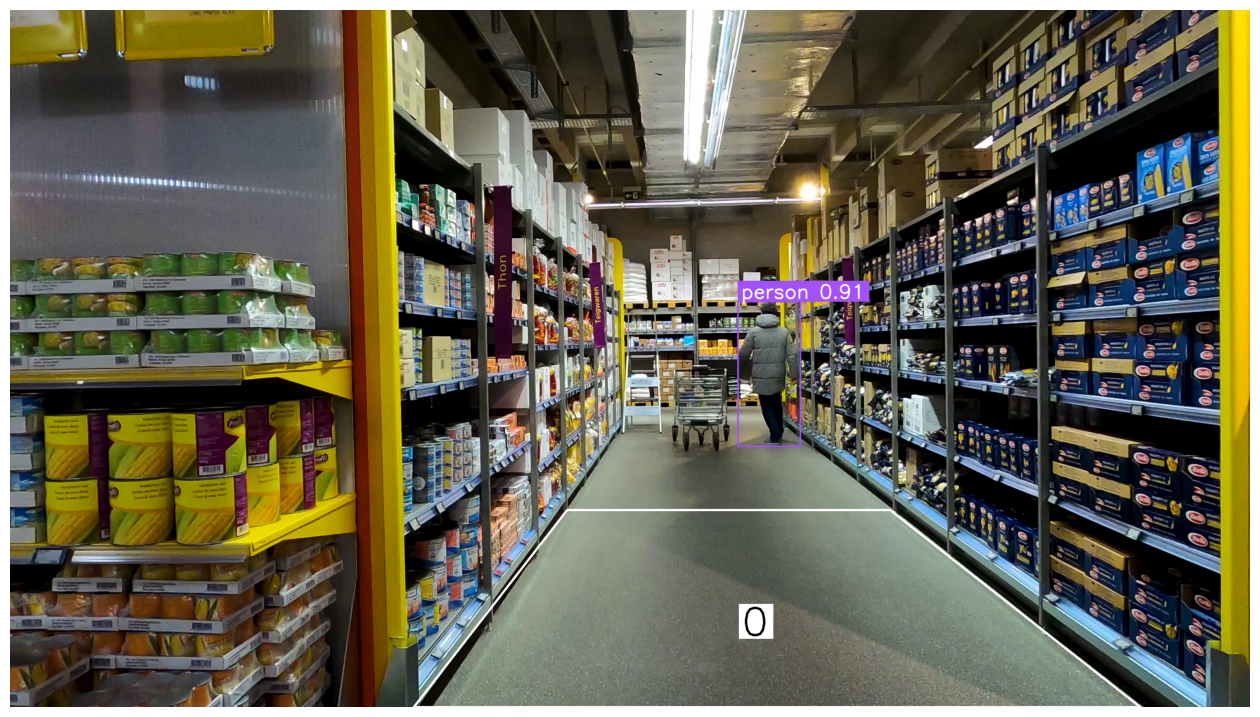

In [10]:
import numpy as np
import supervision as sv

# initiate polygon zone
polygon = np.array([
    [1725, 1550],
    [2725, 1550],
    [3500, 2160],
    [1250, 2160]
])
video_info = sv.VideoInfo.from_video_path(VideoAssets.GROCERY_STORE.value)
zone = sv.PolygonZone(polygon=polygon)

# initiate annotators
box_annotator = sv.BoundingBoxAnnotator(thickness=4)
label_annotator = sv.LabelAnnotator(text_thickness=4, text_scale=2)
zone_annotator = sv.PolygonZoneAnnotator(zone=zone, color=sv.Color.WHITE, thickness=6, text_thickness=6, text_scale=4)

# extract video frame
generator = sv.get_video_frames_generator(VideoAssets.GROCERY_STORE.value)
iterator = iter(generator)
frame = next(iterator)

# detect
results = model(frame, imgsz=1280)[0]
detections = sv.Detections.from_ultralytics(results)
detections = detections[detections.class_id == 0]
zone.trigger(detections=detections)

# annotate
labels = [f"{model.names[class_id]} {confidence:0.2f}" for _, _, confidence, class_id, _, _ in detections]
frame = box_annotator.annotate(scene=frame, detections=detections)
frame = label_annotator.annotate(scene=frame, detections=detections, labels=labels)
frame = zone_annotator.annotate(scene=frame)

%matplotlib inline
sv.plot_image(frame, (16, 16))

In [13]:
import numpy as np
import supervision as sv

# initiate polygon zone
polygon = np.array([
    [1725, 1550],
    [2725, 1550],
    [3500, 2160],
    [1250, 2160]
])
video_info = sv.VideoInfo.from_video_path(VideoAssets.GROCERY_STORE.value)
zone = sv.PolygonZone(polygon=polygon)

# initiate annotators
box_annotator = sv.BoundingBoxAnnotator(thickness=4)
label_annotator = sv.LabelAnnotator(text_thickness=4, text_scale=2)
zone_annotator = sv.PolygonZoneAnnotator(zone=zone, color=sv.Color.WHITE, thickness=6, text_thickness=6, text_scale=4)

def process_frame(frame: np.ndarray, _) -> np.ndarray:
    # detect
    results = model(frame, imgsz=1280)[0]
    detections = sv.Detections.from_ultralytics(results)
    detections = detections[detections.class_id == 0]
    zone.trigger(detections=detections)

    # annotate
    labels = [f"{model.names[class_id]} {confidence:0.2f}" for _, _, confidence, class_id, _, _ in detections]
    frame = box_annotator.annotate(scene=frame, detections=detections)
    frame = label_annotator.annotate(scene=frame, detections=detections, labels=labels)
    frame = zone_annotator.annotate(scene=frame)

    return frame

sv.process_video(source_path=VideoAssets.GROCERY_STORE.value, target_path=f"{HOME}/mall-result.mp4", callback=process_frame)

from IPython import display
display.clear_output()